<a href="https://colab.research.google.com/github/budaoweng98/-/blob/main/summer_work_ff.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#导入库#
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
from torchvision import datasets
import torchvision.transforms as transforms
from torch.utils.data import sampler

to_float = torch.float
to_long = torch.long

if torch.cuda.is_available():
  device = torch.device('cuda')
else:
  device = torch.device('cpu')
print(device)

cpu


In [ ]:
batch_size = 64

transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.5], std=[0.5])#归一#
    ])

train_data = datasets.CIFAR10('data', train=True,
                              download=True, transform=transform)
test_data = datasets.CIFAR10('data', train=False,
                             download=True, transform=transform)

NUM_TRAIN = 49000
train_loader = torch.utils.data.DataLoader(train_data, batch_size=batch_size,
    sampler=sampler.SubsetRandomSampler(range(NUM_TRAIN)))
valid_loader = torch.utils.data.DataLoader(train_data, batch_size=batch_size, 
    sampler=sampler.SubsetRandomSampler(range(NUM_TRAIN, 50000)))
test_loader = torch.utils.data.DataLoader(test_data, batch_size=batch_size)

  0%|          | 0/170498071 [00:00<?, ?it/s]

Extracting data/cifar-10-python.tar.gz to data
Files already downloaded and verified


In [ ]:
class Net(nn.Module):
    def __init__(self):
        super().__init__()
        
        self.net = nn.Sequential(
            nn.Conv2d(3, 6, 5),
            nn.BatchNorm2d(6),
            nn.ReLU(),
            nn.MaxPool2d(2, 2),
            
            nn.Conv2d(6, 16, 5),
            nn.BatchNorm2d(16),
            nn.ReLU(),
            nn.MaxPool2d(2, 2),
            
            nn.Conv2d(16, 32, 3),
            nn.ReLU(),
            nn.MaxPool2d(2, 2),
            
            nn.Flatten(),
            nn.Linear(1*1*32, 16),
            nn.ReLU(),
            
            nn.Linear(16, 6),
        )
        
    def forward(self, x):
        return self.net(x)
model = Net()
print(model)
optimizer = optim.SGD(model.parameters(), lr=0.01)

Net(
  (net): Sequential(
    (0): Conv2d(3, 6, kernel_size=(5, 5), stride=(1, 1))
    (1): BatchNorm2d(6, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
    (3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (4): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
    (5): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (6): ReLU()
    (7): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (8): Conv2d(16, 32, kernel_size=(3, 3), stride=(1, 1))
    (9): ReLU()
    (10): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (11): Flatten(start_dim=1, end_dim=-1)
    (12): Linear(in_features=32, out_features=16, bias=True)
    (13): ReLU()
    (14): Linear(in_features=16, out_features=6, bias=True)
  )
)


In [ ]:
def check_accuracy_part34(loader, model):
  num_correct = 0
  num_samples = 0
  model.eval()  
  with torch.no_grad():
    for x, y in loader:
      x = x.to(device=device, dtype=to_float) 
      y = y.to(device=device, dtype=to_long).clamp(max=5)
      scores = model(x)
      _, preds = scores.max(1)
      num_correct += (preds == y).sum()
      num_samples += preds.size(0)
    acc = float(num_correct) / num_samples
    print('Got %d / %d correct (%.2f)' % (num_correct, num_samples, 100 * acc))
  return acc

In [ ]:
epochs = 5
num_prints = epochs * len(train_loader) // 100 + 1
acc_history = torch.zeros(num_prints, dtype=to_float)
iter_history = torch.zeros(num_prints, dtype=to_long)
model = model.to(device=device)
for epoch in range(epochs):
    for t, (x, y) in enumerate(train_loader):
        model.train()
        x = x.to(device=device, dtype=to_float)
        y = y.to(device=device, dtype=to_long).clamp(max=5)
        
        scores = model(x)
        loss = F.cross_entropy(scores, y)
        
        optimizer.zero_grad()
        
        loss.backward()
        
        optimizer.step()
        
        tt = t + epoch * len(train_loader)
        
        if tt % 100 == 0 or (epoch == epochs - 1 and t == len(train_loader) - 1):
            print("Epoch: %d, Iteration: %d, loss = %.4f" %(epoch, tt, loss.item()))
            acc = check_accuracy_part34(valid_loader, model)
            acc_history[tt // 100] = acc
            iter_history[tt // 100] = tt
            print()

/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:718: UserWarning: Named tensors and all their associated APIs are an experimental feature and subject to change. Please do not use them for anything important until they are released as stable. (Triggered internally at  /pytorch/c10/core/TensorImpl.h:1156.)
  return torch.max_pool2d(input, kernel_size, stride, padding, dilation, ceil_mode)


Epoch: 0, Iteration: 0, loss = 1.7948
Got 112 / 1000 correct (11.20)

Epoch: 0, Iteration: 100, loss = 1.5564
Got 525 / 1000 correct (52.50)

Epoch: 0, Iteration: 200, loss = 1.2112
Got 525 / 1000 correct (52.50)

Epoch: 0, Iteration: 300, loss = 1.5298
Got 525 / 1000 correct (52.50)

Epoch: 0, Iteration: 400, loss = 1.4214
Got 525 / 1000 correct (52.50)

Epoch: 0, Iteration: 500, loss = 1.2738
Got 529 / 1000 correct (52.90)

Epoch: 0, Iteration: 600, loss = 1.2430
Got 528 / 1000 correct (52.80)

Epoch: 0, Iteration: 700, loss = 1.3747
Got 525 / 1000 correct (52.50)

Epoch: 1, Iteration: 800, loss = 1.2757
Got 527 / 1000 correct (52.70)

Epoch: 1, Iteration: 900, loss = 1.2561
Got 535 / 1000 correct (53.50)

Epoch: 1, Iteration: 1000, loss = 1.1294
Got 538 / 1000 correct (53.80)

Epoch: 1, Iteration: 1100, loss = 1.0852
Got 539 / 1000 correct (53.90)

Epoch: 1, Iteration: 1200, loss = 1.2297
Got 548 / 1000 correct (54.80)

Epoch: 1, Iteration: 1300, loss = 1.2933
Got 551 / 1000 correct

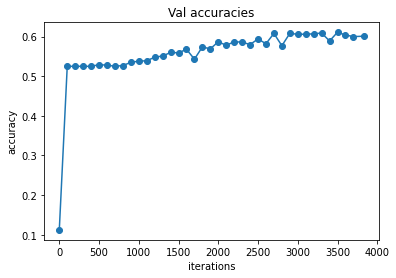

In [ ]:
import matplotlib.pyplot as plt
plt.title('Val accuracies')
plt.plot(iter_history, acc_history, '-o')
plt.xlabel('iterations')
plt.ylabel('accuracy')
plt.show()


Predict label is:  tensor([4])
Real lable is:  tensor([3])


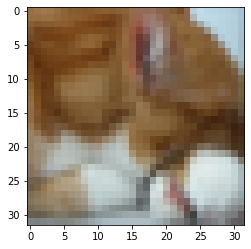

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

data_loader = torch.utils.data.DataLoader(test_data, batch_size=1, shuffle=True)
image, label = next(iter(data_loader))
image = image.to(device=device, dtype=to_float)
label = label.to(device=device, dtype=to_long).clamp(max=5)
scores = model(image)
_, pred = scores.max(1)
print('Predict label is: ', pred)
#to_pil_image = transforms.ToPILImage()
#img = to_pil_image(image[0])
img = image[0].cpu().numpy().transpose(1,2,0)
mean = [0.5]
std = [0.5]
img = img * std + mean
#plt.figure(figsize=(1, 1))
plt.imshow(img)
print('Real lable is: ', label)

#x_test = x_test.to(device=device, dtype=to_float)
#y_test = 